In [2]:
# https://towardsdatascience.com/image-classifier-cats-vs-dogs-with-convolutional-neural-networks-cnns-and-google-colabs-4e9af21ae7a8
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
import time
from IPython.display import Image
from sklearn.model_selection import train_test_split

In [3]:
# from google.colab import drive 
# drive.mount('/content/gdrive')

In [4]:
import os
import zipfile
path = r"gdrive/My Drive/DMSPro-Business Retail Data"

In [5]:

# local_zip = path + "/cats_and_dogs_filtered.zip"
local_zip = r"cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(path + "/DogAndCatDataset")
zip_ref.close()

In [6]:
base_dir = path + "/DogAndCatDataset/cats_and_dogs_filtered"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# print(os.path.join)

# # Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_cats_dir

# # Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# # Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# # Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [7]:
train_cat_fnames = os.listdir(train_cats_dir) # liệt kê tên tất cả tên ảnh trong thư mục
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir) # liệt kê tên tất cả tên ảnh trong thư mục
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.952.jpg', 'cat.946.jpg', 'cat.6.jpg', 'cat.749.jpg', 'cat.991.jpg', 'cat.985.jpg', 'cat.775.jpg', 'cat.761.jpg', 'cat.588.jpg', 'cat.239.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [8]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


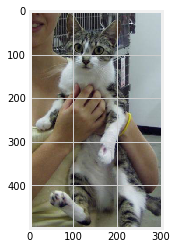

In [9]:
import random
idx = random.randint(0,1000)
idx
train_cats_dir

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_path = train_cats_dir + "/" + "cat." + str(idx)  + ".jpg"

img = mpimg.imread(img_path)
plt.imshow(img)

In [ ]:
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util

def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

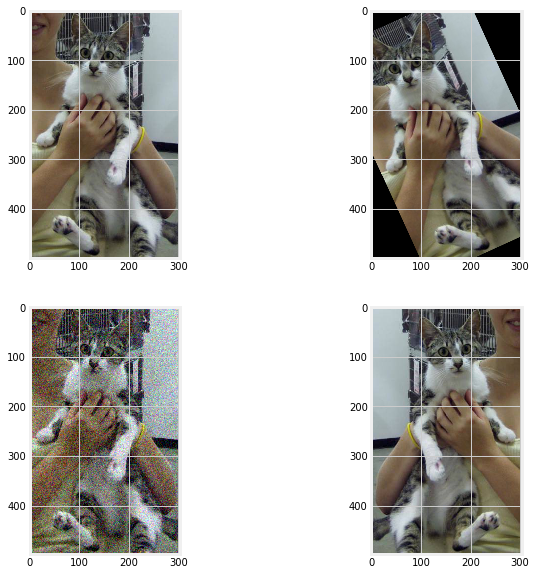

In [ ]:
# dictionary of the transformations functions we defined earlier
available_transformations = {
    'rotate': random_rotation,
    'noise': random_noise,
    'horizontal_flip': horizontal_flip
}


transformed_image_rotate = available_transformations['rotate'](img)
transformed_image_noise = available_transformations['noise'](img)
transformed_image_horizontal_flip = available_transformations['horizontal_flip'](img)

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.figure(figsize=(10,10))
sp = plt.subplot(221)
plt.imshow(img)
sp = plt.subplot(222)
plt.imshow(transformed_image_rotate)
sp = plt.subplot(223)
plt.imshow(transformed_image_noise)
sp = plt.subplot(224)
plt.imshow(transformed_image_horizontal_flip)
plt.show()

In [ ]:
%conda install -c anaconda opencv



#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2

import numpy as np
%matplotlib inline
import matplotlib.image as mpimg

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
Comparing specs that have this dependency:   0%|         | 0/36 [00:00<?, ?it/s]

Finding conflict paths:   0%|                             | 0/2 [00:00<?, ?it/s]

Finding shortest conflict path for importlib_metadata:   0%| | 0/2 [00:00<?, ?it/s]\ 

Finding shortest conflict path for importlib_metadata:  50%|▌| 1/2 [00:05<00:05,  5.64s/it]

Finding shortest conflict path for importlib_metadata: 100%|█| 2/2 [00:05<00:00,  2.82s/it]- 

                                                                                           
Comparing specs that have this dependency:   3%| | 1/36 [00:09<05:24,  9.28s/it]

Finding conflict paths:   0%|                             | 0/2 [00:00<?, ?it/s]

Finding shortest conflict path for importlib_metadata:   0%| | 0/2 [00:00<?, ?it/s]- 


In [ ]:
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness


    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    if brightness == 1:
      img = augment_brightness_camera_images(img)

    return img

In [ ]:
import random
idx = random.randint(0,1000)
idx
train_cats_dir

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_path = train_cats_dir + "/" + "cat." + str(idx)  + ".jpg"

img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off');

In [ ]:
gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
plt.figure(figsize=(12,12))
for i in range(100):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    augmented_img = transform_image(img,20,10,5,brightness=1)

    plt.subplot(10,10,i+1)
    plt.imshow(augmented_img)
    plt.axis('off')

plt.show()

In [ ]:
import random
idx = random.randint(0,1000)
idx
train_cats_dir

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_path = train_cats_dir + "/" + "cat." + str(idx)  + ".jpg"

img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off');

In [ ]:
gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
plt.figure(figsize=(12,12))
for i in range(100):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    augmented_img = transform_image(img,20,10,5,brightness=1)

    plt.subplot(10,10,i+1)
    plt.imshow(augmented_img)
    plt.axis('off')

plt.show()

In [ ]:
#  Bắt đầu sử dụng thư viện để sử lí ảnh
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest' # fill_mode: nearest => xoay ảnh sẽ bị mất những góc của hình
)

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path = os.path.join(train_cats_dir, train_cat_fnames[2])
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The .flow() command below generates batches of randomly transformed images
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger

In [ ]:
# Hyperparams
IMAGE_SIZE = 200
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 20
BATCH_SIZE = 32
TEST_SIZE = 30

In [ ]:
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

# Model 5
model = Sequential()

model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))
    
model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
# Data augmentation
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
training_data_dir = train_dir
validation_data_dir = validation_dir
test_data_dir = validation_dir

In [ ]:
# Data preparation
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary", 
    shuffle=False)

In [ ]:
# # Training
# model.fit_generator(
#     training_generator,
#     steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
#     epochs=EPOCHS,
#     validation_data=validation_generator,
#     validation_steps=len(validation_generator.filenames) // BATCH_SIZE,
#     verbose=1)

In [ ]:
MODEL_FILE = path + "/DogAndCatDataset/cats_and_dogs_filtered/model_Cat and Dog Classifier.h5"
# model.save_weights(MODEL_FILE)

In [ ]:
# Load Model
model.load_weights(MODEL_FILE)

In [ ]:
# https://github.com/gsurma/image_classifier/blob/master/image_classifier.ipynb

In [ ]:
probabilities = model.predict_generator(test_generator, TEST_SIZE)
for index, probability in enumerate(probabilities):
    image_path = test_data_dir + "/" +test_generator.filenames[index]
    img = mpimg.imread(image_path)
#     with open(TEST_FILE,"a") as fh:
#         fh.write(str(probability[0]) + " for: " + image_path + "\n")
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% dog")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% cat")
    plt.show()